In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
using YAXArrays
using Zarr
using Dates
include("src/rainforest_lib.jl")
using .Rainforestlib


  Activating project at `~/workspace/uni/spatial_temporal_data/spatio_temporal_data-rainforest_development`


In [2]:
lc = Rainforestlib.get_lcc_datacube()

filtered_dc = Rainforestlib.rough_spatial_filter(lc; time_bounds = (Date(2010), Date(2021)))


YAXArray with the following dimensions
lon                 Axis with 2700 Elements from -89.9986111111111 to -30.02083333333332
lat                 Axis with 2025 Elements from 14.979166666666675 to -29.99861111111111
time                Axis with 11 Elements from 2010-01-01T00:00:00 to 2020-01-01T00:00:00
name: lccs_class
Total size: 57.36 MB


In [3]:
include("src/LCCSClasses.jl")
using .LCCSClasses

# set a set of accepted values
rainforest_values = Set(LCCSClasses.categories["rainforest"].lccs_classes)

forest_values = Set(LCCSClasses.categories["forest"].lccs_classes)

all_forest_values = union(forest_values, rainforest_values)

Set{String} with 13 elements:
  "tree_needleleaved_evergreen_open"
  "tree_needleleaved_deciduous_closed"
  "tree_needleleaved_deciduous_open"
  "tree_needleleaved_deciduous_closed_to_open"
  "tree_broadleaved_deciduous_open"
  "tree_broadleaved_deciduous_closed"
  "tree_broadleaved_evergreen_closed_to_open"
  "tree_cover_flooded_saline_water"
  "tree_needleleaved_evergreen_closed"
  "tree_mixed"
  "tree_broadleaved_deciduous_closed_to_open"
  "tree_cover_flooded_fresh_or_brakish_water"
  "tree_needleleaved_evergreen_closed_to_open"

┌ Warning: Could not find font regular, using TeX Gyre Heros Makie
└ @ Makie /home/denis/.julia/packages/Makie/iECbF/src/conversions.jl:993


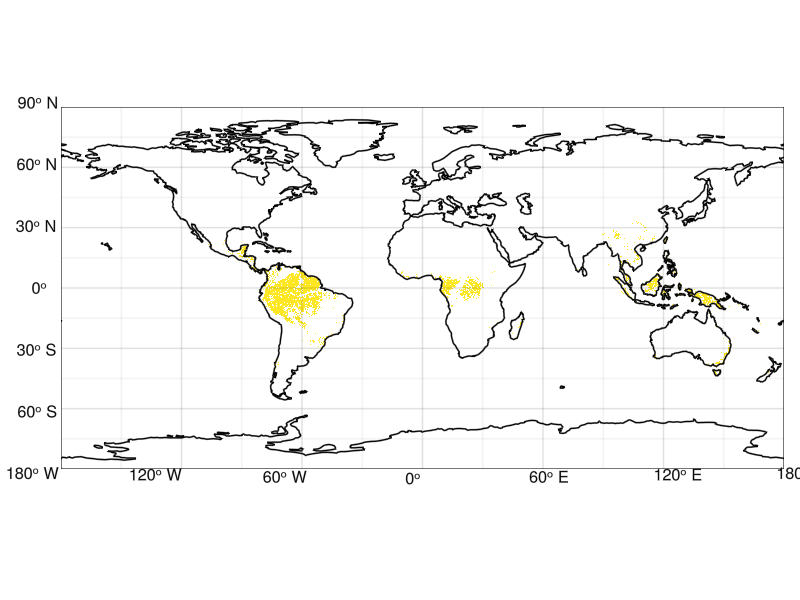

In [4]:
# WARNING: do not try this with the huge datacube, it wont work. The in function needs to be ported to datacubes, the native one is not working
# to create the world map, simply set local_map=false
global_figure = Rainforestlib.build_figure_by_lcc_classes(lc, rainforest_values; local_map = false, set_nan = true)

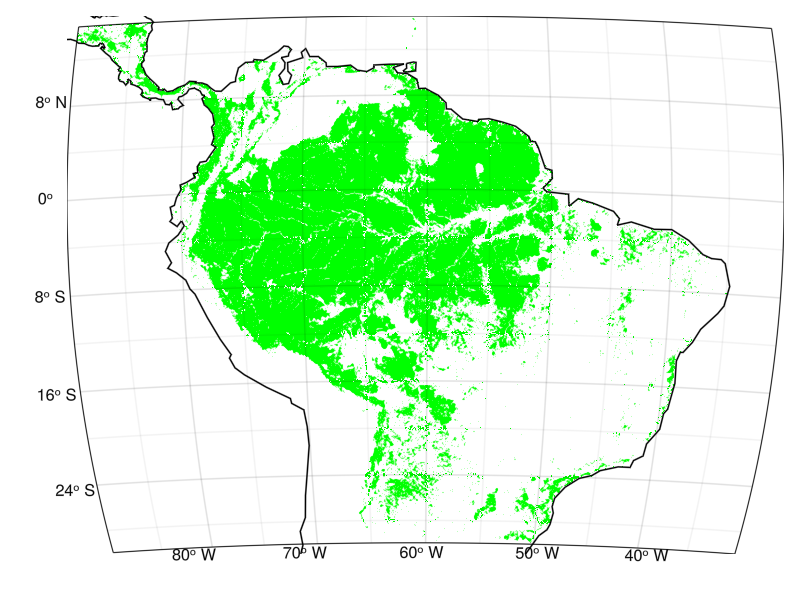

In [5]:
using .Rainforestlib

# local is the default, and makes the map as large as the datapoints
# but can me changed by setting 

using Colors, ColorSchemes

custom_colormap = [
    RGB(1.0, 1.0, 1.0),  # Red
    RGB(0.0, 0.0, 1.0),  # Blue
    RGB(0.0, 1.0, 0.0)   # Green
]

local_figure = Rainforestlib.build_figure_by_lcc_classes(filtered_dc, all_forest_values; colormap = custom_colormap, colorrange = (0,1), set_nan = true)

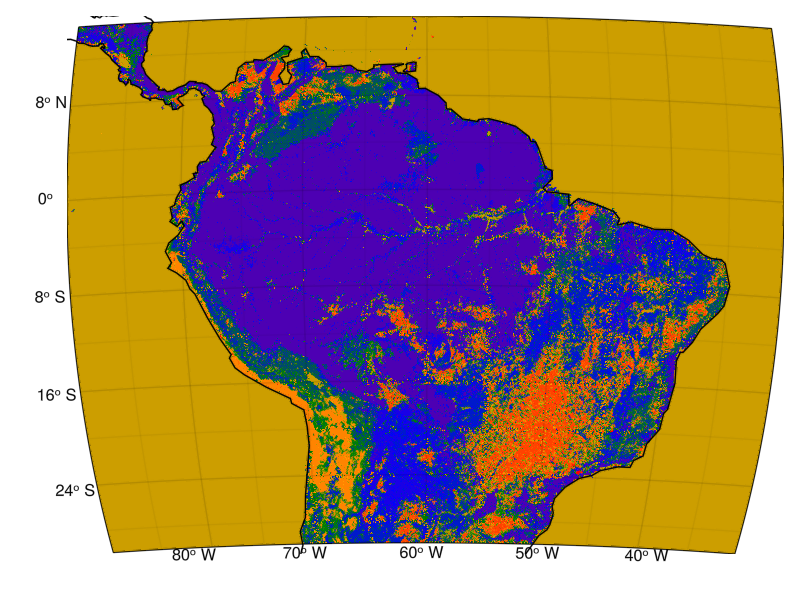

In [11]:
using .Rainforestlib

local_figure = Rainforestlib.build_figure_all_classes(filtered_dc; set_nan = true)

Number of rainforest pixels in 2010-01-01T00:00:00: 1.323975e6
Diff to last: 1.323975e6


Number of rainforest pixels in 2011-01-01T00:00:00: 1.322267e6
Diff to last: -1708.0


Number of rainforest pixels in 2012-01-01T00:00:00: 1.321332e6
Diff to last: -935.0


Number of rainforest pixels in 2013-01-01T00:00:00: 1.32073e6
Diff to last: -602.0


Number of rainforest pixels in 2014-01-01T00:00:00: 1.321052e6
Diff to last: 322.0


Number of rainforest pixels in 2015-01-01T00:00:00: 1.321048e6
Diff to last: -4.0


Number of rainforest pixels in 2016-01-01T00:00:00: 1.322098e6
Diff to last: 1050.0


Number of rainforest pixels in 2017-01-01T00:00:00: 1.321949e6
Diff to last: -149.0


Number of rainforest pixels in 2018-01-01T00:00:00: 1.320433e6
Diff to last: -1516.0


Number of rainforest pixels in 2019-01-01T00:00:00: 1.320357e6
Diff to last: -76.0


Number of rainforest pixels in 2020-01-01T00:00:00: 1.320516e6
Diff to last: 159.0


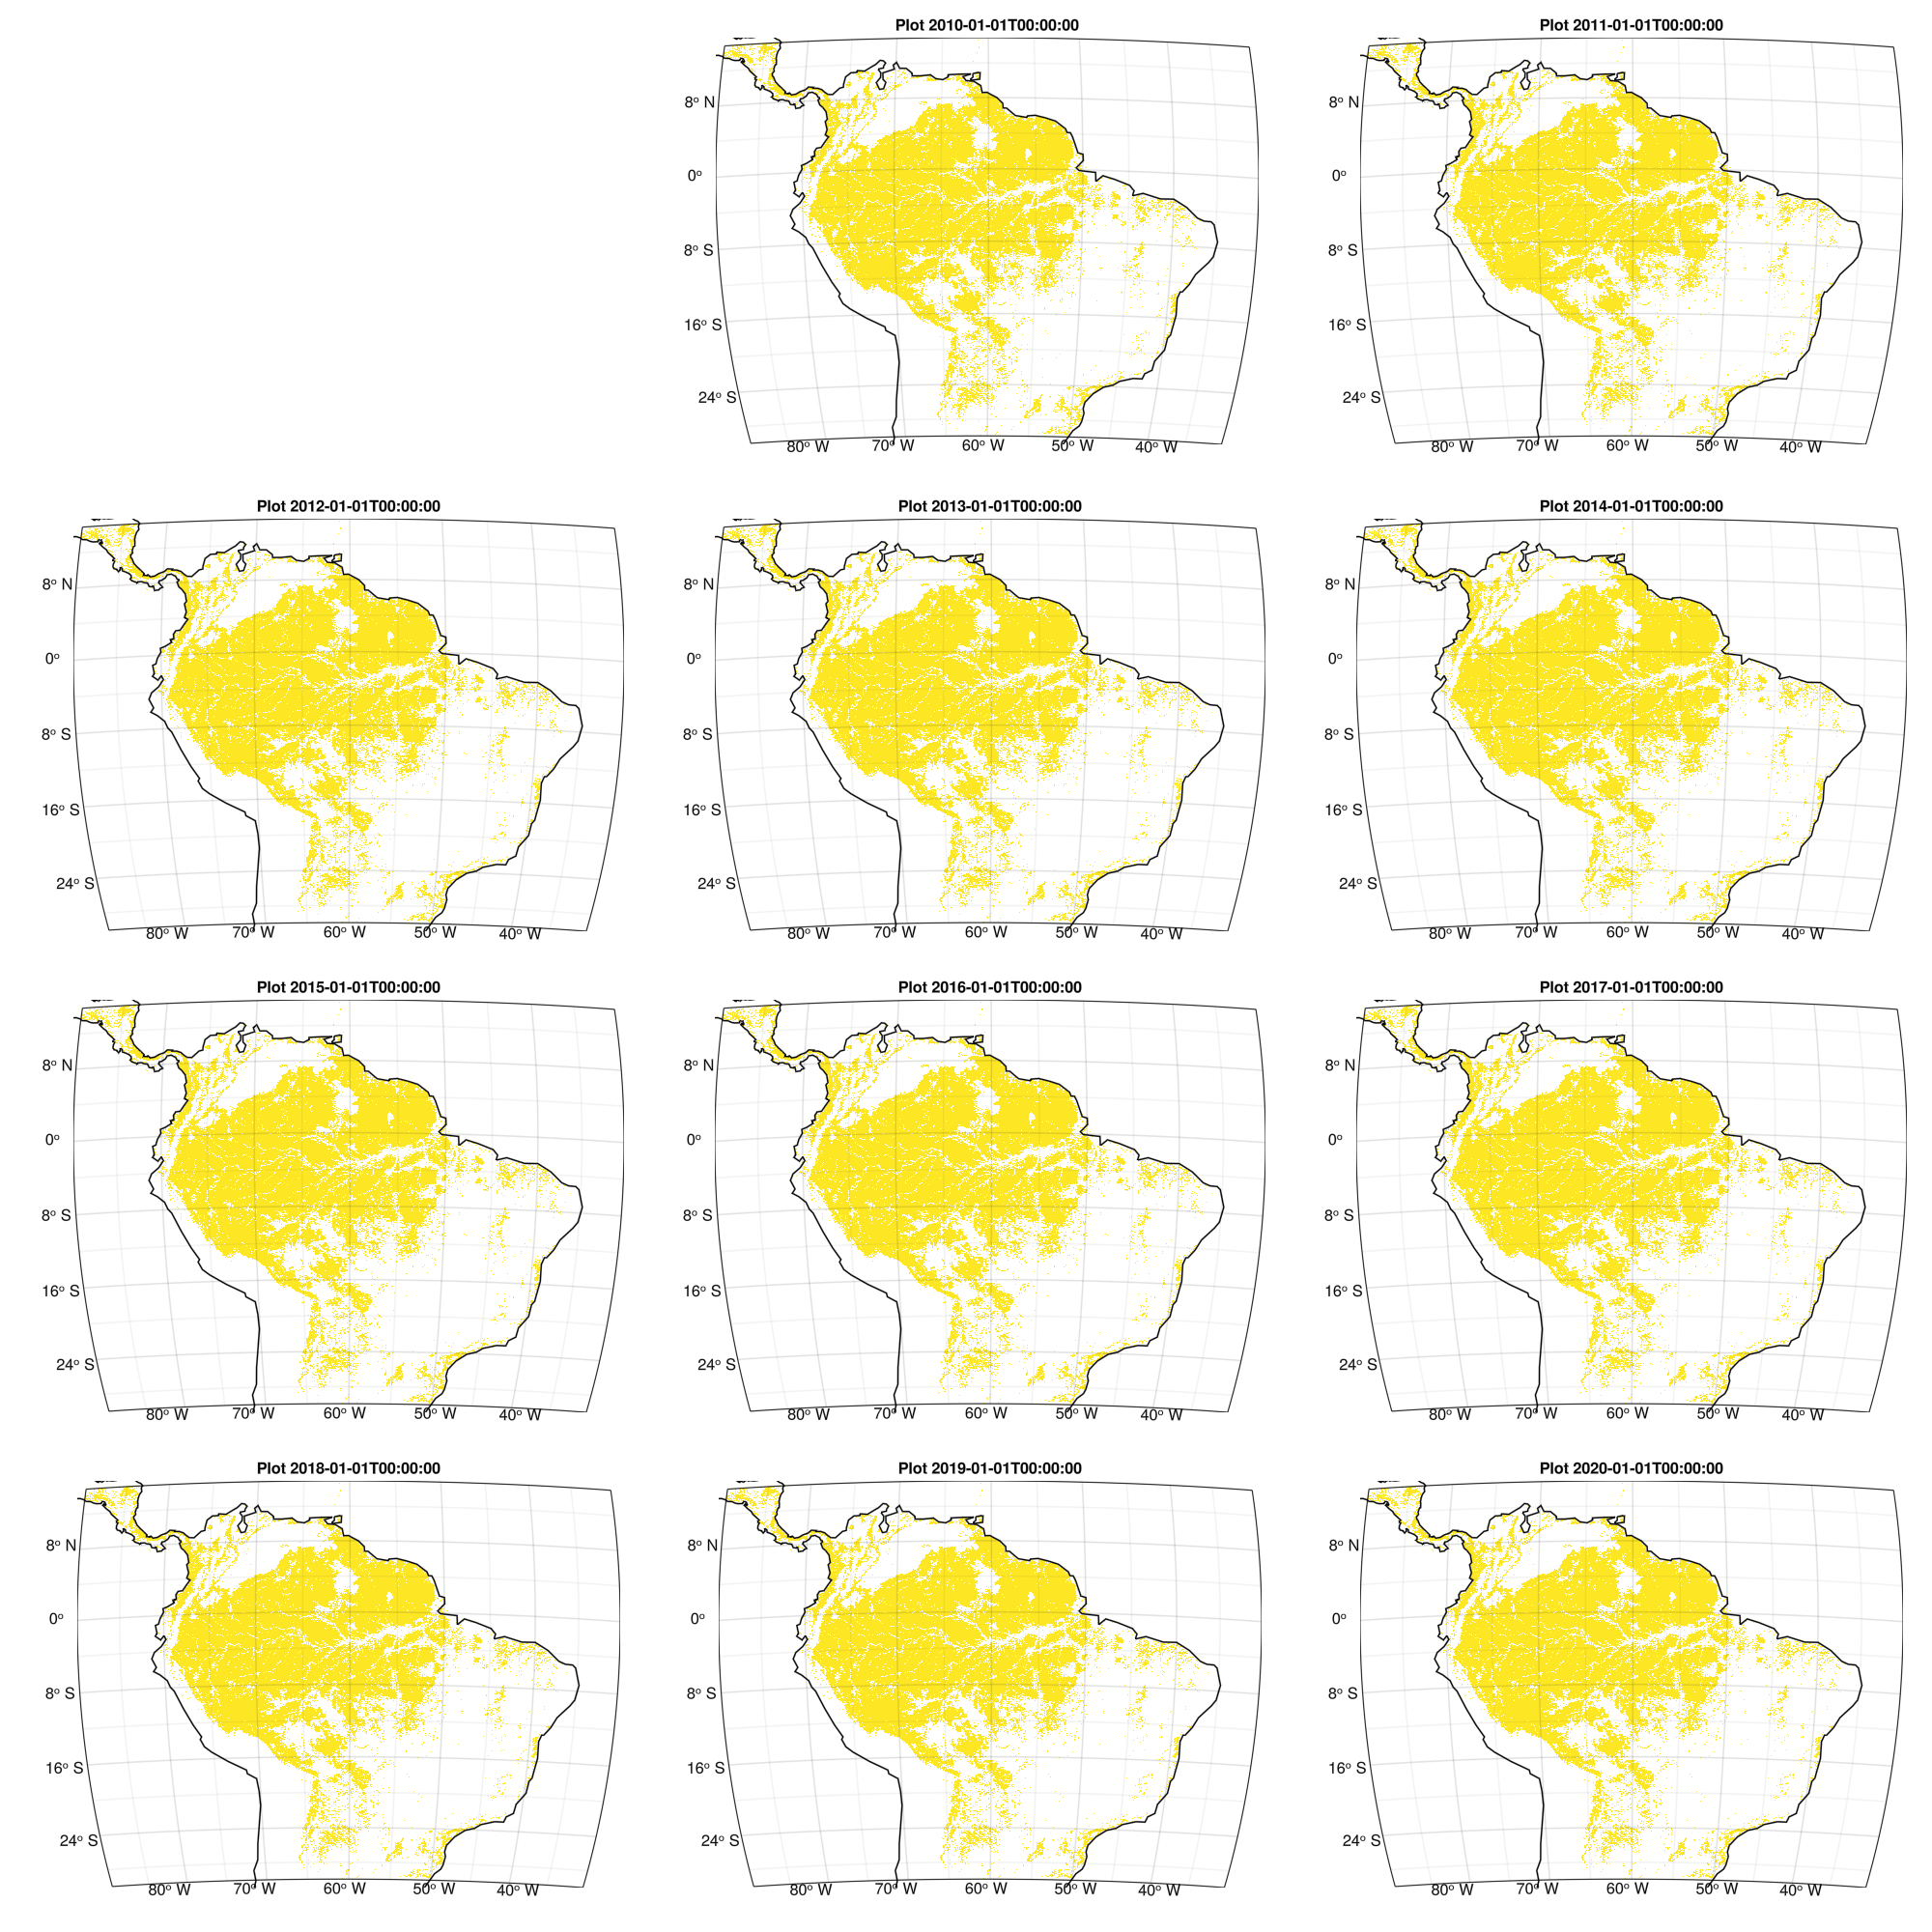

In [7]:
Rainforestlib.build_plots_over_time(filtered_dc, all_forest_values; resolution=(2000, 2000), set_nan = true)

In [8]:
# build one figure with diffs for each timestep

using .Rainforestlib
using Colors, ColorSchemes
using GLMakie


custom_colormap = [
    RGB(1.0, 1.0, 1.0),  # White
    RGB(0.0, 1.0, 0.0),  # Green
    RGB(0.0, 0.0, 1.0),  # Blue
    RGB(1.0, 0.0, 0.0),  # Red
]

Rainforestlib.build_diff_figures_over_time(filtered_dc, Rainforestlib.LCCSClasses.categories["rainforest"], "imgs"; colormap = custom_colormap, resolution = (3000, 3000))


Number of rainforest pixels in 2010-01-01T00:00:00: 1.153019e6


Number of rainforest pixels in 2011-01-01T00:00:00: 1.152425e6


Number of rainforest pixels in 2012-01-01T00:00:00: 1.152304e6


Number of rainforest pixels in 2013-01-01T00:00:00: 1.152065e6


Number of rainforest pixels in 2014-01-01T00:00:00: 1.152834e6


Number of rainforest pixels in 2015-01-01T00:00:00: 1.15283e6


Number of rainforest pixels in 2016-01-01T00:00:00: 1.153275e6


Number of rainforest pixels in 2017-01-01T00:00:00: 1.15314e6


Number of rainforest pixels in 2018-01-01T00:00:00: 1.152691e6


Number of rainforest pixels in 2019-01-01T00:00:00: 1.153102e6


Number of rainforest pixels in 2020-01-01T00:00:00: 1.153346e6
